In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
file_path = "./data/US_Accidents.xlsx" 
df = pd.read_excel(file_path)

print(df.head())

          ID  Severity           Start_Time             End_Time         City  \
0  A-2281331         2  2019-02-12 21:56:01  2019-02-12 22:25:51  Geyserville   
1   A-342355         2  2017-03-29 12:29:35  2017-03-29 12:58:29  Santa Clara   
2  A-3672199         2  2023-03-27 15:13:00  2023-03-27 17:24:51    Hawthorne   
3  A-5762609         2  2021-08-10 15:46:00  2021-08-10 17:59:17  Bakersfield   
4  A-5619754         2  2021-12-14 05:07:30  2021-12-14 06:06:00      Anaheim   

  State  Temperature(F)  Humidity(%)  Visibility(mi) Weather_Condition  
0    CA            44.1         93.0             5.0              Rain  
1    CA            70.0         46.0            10.0     Mostly Cloudy  
2    CA            74.0         12.0            10.0              Fair  
3    CA           103.0         16.0             7.0              Fair  
4    CA            48.0          NaN             3.0              Rain  


In [3]:
# # If 'Start_Time' column exists in the DataFrame
if 'Start_Time' in df.columns:
# Convert 'Start_Time' to datetime format
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce', format='mixed')

In [4]:
# Extract hour, day name, and month name from 'Start_Time'
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

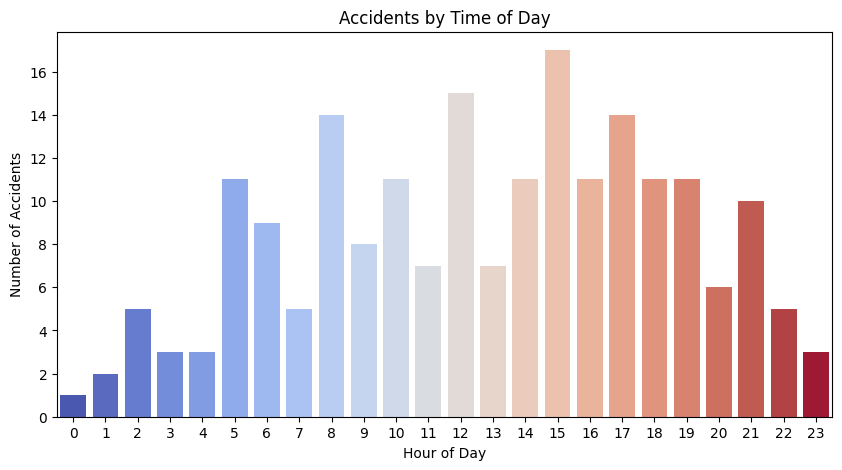

In [5]:
# Plot number of accidents for each hour of the day
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Hour'], hue=df['Hour'], palette='coolwarm', legend=False)
plt.title("Accidents by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

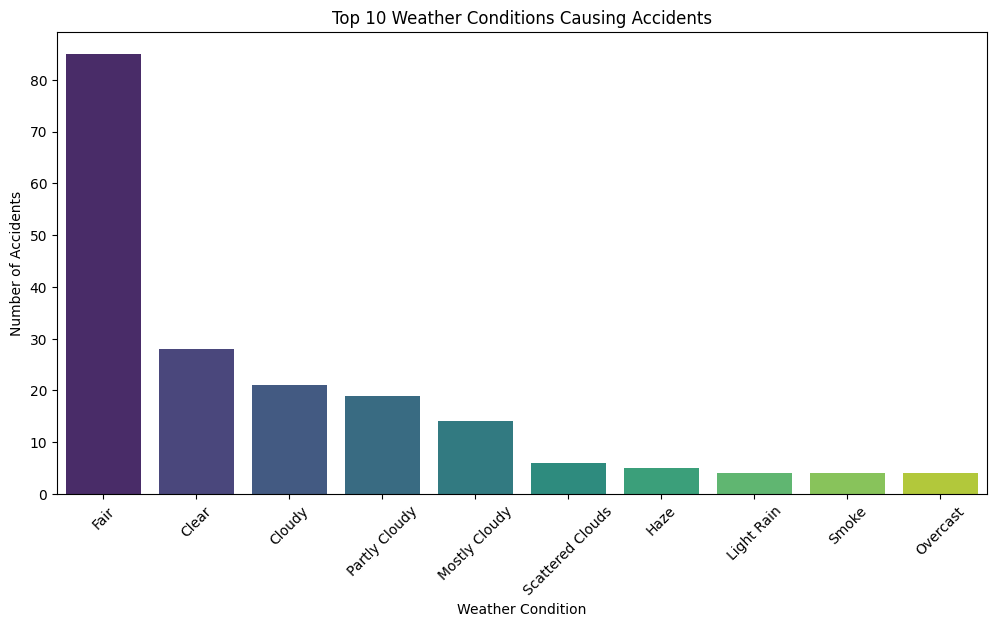

In [6]:
# Plot top 10 weather conditions associated with the most accidents
plt.figure(figsize=(12, 6))
top_weather = df['Weather_Condition'].value_counts().nlargest(10)
sns.barplot(x=top_weather.index, y=top_weather.values, hue=top_weather.index, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Weather Conditions Causing Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()

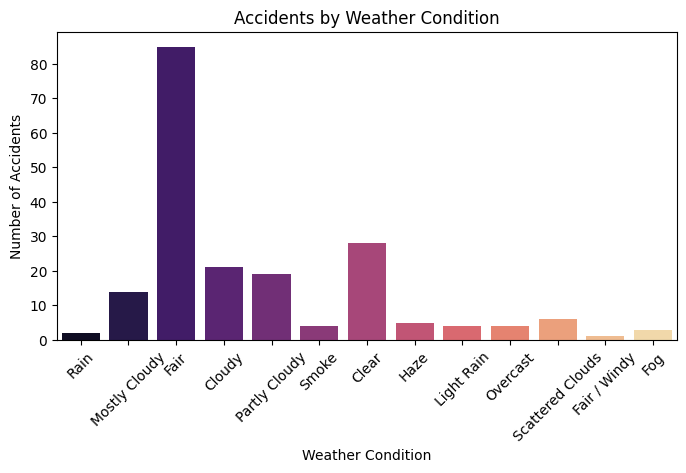

In [7]:
# Plot number of accidents for each weather condition
plt.figure(figsize=(8, 4))
sns.countplot(x='Weather_Condition', data=df, hue='Weather_Condition', palette='magma', legend=False)
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

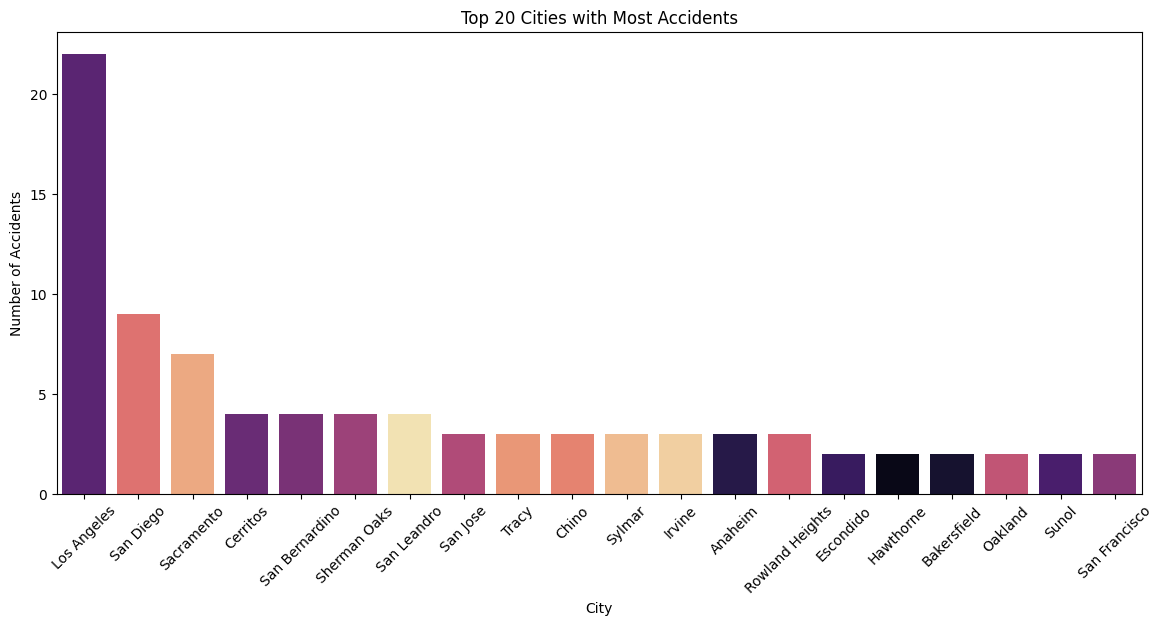

In [8]:
# Plot top 20 cities with the highest number of accidents
plt.figure(figsize=(14, 6))
top_cities = df["City"].value_counts().head(20).index
sns.countplot(
    x="City",
    hue="City",
    data=df[df["City"].isin(top_cities)],
    order=top_cities,
    palette="magma",
    legend=False
)
plt.title("Top 20 Cities with Most Accidents")
plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()